# How to do Neural Network Learning for Breast Cancer Diagnostics 

## Introduction
Demo of neural net for breast cancer diagnostics.

### Business Understanding
High sensitivity, specitifity and precision for accurate diagnosis.

### Data Understanding


In [2]:
import os
print(os.getcwd())
%ls data\*.csv

C:\Users\paulw\Dropbox\0 Current Work\Data Analytics 2019\labs-2019
 Volume in drive C is Windows
 Volume Serial Number is 44EC-5869

 Directory of C:\Users\paulw\Dropbox\0 Current Work\Data Analytics 2019\labs-2019\data

24/01/2019  09:43             8,318 500_Person_Gender_Height_Weight_Index.csv
26/01/2019  16:31            10,335 age_weight_height_gender.csv
26/01/2019  16:19            15,396 AgeWeightHeightMen.csv
25/09/2016  10:49           125,204 cancer-data.csv
12/11/2018  19:44        27,637,580 drugsComTest_raw.csv
25/02/2019  16:10           518,824 drugsComTest_small.csv
25/02/2019  15:45        82,990,470 drugsComTrain_raw.csv
25/02/2019  16:11         1,013,326 drugsComTrain_small.csv
27/01/2019  10:34           882,629 fortune500.csv
30/04/2018  20:46           500,391 groceries.csv
21/02/2018  00:15            55,628 insurance.csv
30/04/2018  20:46             4,295 iris.csv
30/04/2018  20:46         1,714,089 ml-100k.csv
12/02/2019  10:07             3,187 multiTimel

The file is there, so we can now read in the file contents into a DataFrame data structure provided by the Panda library, which  offers data structures and operation for manipulating data:

In [3]:
# Import Pandas data manpulation library
import pandas as pd    
# Read the comma seperated values file into a Pandas dataframe object
df = pd.read_csv('./data/cancer-data.csv')

We can now get our first look at the data, so let's check out how many rows and columns we have.

In [4]:
#Print out the first 5 rows
df.shape

(569, 33)

We seem to have a decent amount of data as we have 569 rows and 33 columns. Now let's see some actual data by listing the first 5 rows.

In [5]:
#Print out the first 5 rows
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


This first snippet shows that we have data that matches the description of the WBCD dataset. However there is a lot of data, so let's see if we are missing any values. We can do this via the isnull dataframe method, which will tell us if the datframe contains and null (empty) of not a number (NaN) entries:

In [6]:
# Check for any null NaN values
df.isnull().values.any()

True

This returns true, and on inspection, there is indeed a whole colummn of NaN values, called "Unnamed 32". This do not server any purpose for our requirements, so we can remove this column. So let's see if there are any other potential issues with the data, bearing in mind that we are look ing for good numerical data that will allow us build a ML model that can correctly classify data. So let's use some code to see if there are any non-numerics colums in our data set:

In [7]:
#List all non-floating point columns in the data frame.
df.select_dtypes(exclude=['float']).head()

,id,diagnosis
0,842302,M
1,842517,M
2,84300903,M
3,84348301,M
4,84358402,M


This returns two columns: id and diagnosis. The ID column is label data that is used to track the cell tissue samples from the patients and is not needed to aid our analysis and so can be removed from the data set. So let's drop that along with the Unnamed 32 column.

In [8]:
# Drop the 'Unnamed 32' and id column
df = df.drop(['id', 'Unnamed: 32'], axis=1)

This 'diagnosis' column is <a href="https://en.wikipedia.org/wiki/Categorical_variable">categorical</a> data and as described in the data desription docmentation it consists of just two values: 'B' for benign and 'M' for malignant. 
This feature column can be used for training a machine learning model, so we will decide how to handle this at a later stage. For now let's see how the diagnosis data is distributed.

In [9]:
import numpy as np
np.set_printoptions(precision=2, suppress=True)
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8, 6]
categories, category_counts = np.unique(df.values[:,0], return_counts=True)
#print(categories)
#print(category_counts)
colors = ['orange', 'lightgreen']
#plt.figure(figsize=(8,5))
plt.pie(category_counts, labels=categories, explode=(0.05,0), colors=colors,
       autopct='%1.0f%%', shadow=True,);

This shows that nearly two-thirds of the cancer tissue samples are for benign tumours and the remaining third are for malignant tumors.  This is useful information as it may have an impact an analysis at a later stage.  
It would also be useful to analyse the input feature data set and we can do this by getting summary descriptive statistics and by creating box plots of the various features. Recall that the the mean, worst and standard error values are tracked for each of the cells features, so let's get summary stats and plot each of these in box plots to get a sense of the data.

In [10]:
#Get a summary statistical summary of the data using the Dataframe describe command
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


This statistical summary is useful, but is a bit hard to digest, so I prefer to include the box plots below in order to visually inspect the data.

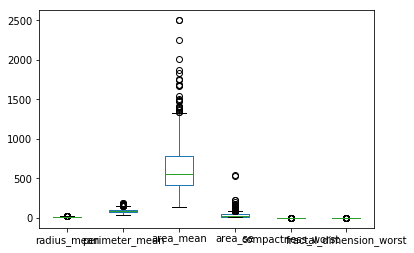

In [11]:
# Box plot of sample WBCD features
#plt.boxplot(df.iloc[:,['radius_mean','perimeter_mean','area_mean', 'area_se']]); #, figsize=(16,8));
# Box plot first 10 floating point WBCD features
df.loc[:,['radius_mean','perimeter_mean','area_mean', 'area_se','compactness_worst','fractal_dimension_worst']].plot.box(return_type='axes');
# Box plot first 10 floating point WBCD features
#df.iloc[:,1:10].plot.box(return_type='axes');
#df.iloc[:,11:20].plot.box(return_type='axes', figsize=(16,8));
#df.iloc[:,21:30].plot.box(return_type='axes', figsize=(16,8));

What jumps out here is the fact that the range of values across the data set varies significantly with the area_mean, area_worst and area_se having a much wider range of values. For example radius_mean has a minimum value of 6.981 and maximum value of 28.11, compared with area_mean, which has a minumum value of 143.5 and a maximum value of 2501. This will skew later analysis and can be corrected by standardising the values between 0 and 1. 

### Data Preparation
In the preparation phase will construct the final data set that will be used to build a machine learning model. We will ensure that we have removed  unnecessary features, scale all features to a standard range of values, highlights those features that are most relevant and partition the data into a training set and a test set. 
In the Data Understanding phase of CRISP-DM we have already dropped the ID and Unnamed 32 columns. We should  now  separate the datasets into input features and target output  datasets.  The input features will be used as  training input into the machine learning model and the output of the model will be compared with the target  oiutput.  Recall that  are business requirements for this project are to be able to classify  patient samples as out of benign or malignant based on visual cell features, such as mean area, radius, perimeter etc..  So for this project we will be using floating points features of the training set as input and the diagnosis field as the target output.

In [12]:
# Create input dataset using the numerical features from the original dataset'
input_features = df.values[:,1:]
# Create the taget output from the 
target_output = df.values[:,0]

We can see the range of values  for some of the input features by producing the plot  shown below,  which shows us that the range of values for area (red line)  are much greater than the others. 

C:\Users\paulw\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


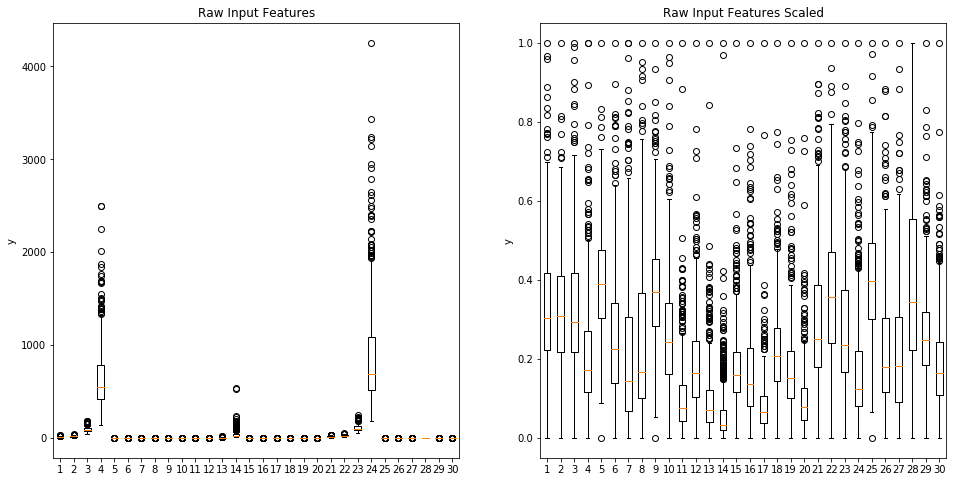

In [13]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)

plt.boxplot(input_features)
plt.title('Raw Input Features')
plt.ylabel('y')

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
input_features_scaled = scaler.fit_transform(input_features)

plt.subplot(1, 2, 2)
plt.boxplot(input_features_scaled)
plt.title('Raw Input Features Scaled')
plt.ylabel('y')

plt.show();

What is striking in a second box plot is that there seems to be a number of features that have extreme outliers.  It is good practice in machine learning to remove outliers that are 3 standard deviations away from the mean.

Next we will partition the data set into a training set and a test set. The training set will be used to build the machine learning model is important to make sure that the model has not been over fitted to the data and that the resulting model is capable of generalizing over unseen data. It is for this reason that a portion of the dataset is held back from the training phase of the model construction and is used at a later phase to test the machine learning model.

A validation dataset can also be used when training the model to evaluate it's performance.


In [14]:
#https://www.kaggle.com/georgiost77/breast-cancer-machine-learning-prediction 
from sklearn.model_selection import train_test_split

training_set_input, test_set_input, training_set_output, test_set_output = train_test_split(input_features, target_output,
                                                                            test_size=0.2, random_state=905)


In [15]:
categories, training_category_counts = np.unique(training_set_output, return_counts=True)
print("Training Set:")
print(categories)
print(training_category_counts)
categories, test_category_counts = np.unique(test_set_output, return_counts=True)
print("Test Set:")
print(categories)
print(test_category_counts)


Training Set:
['B' 'M']
[292 163]
Test Set:
['B' 'M']
[65 49]


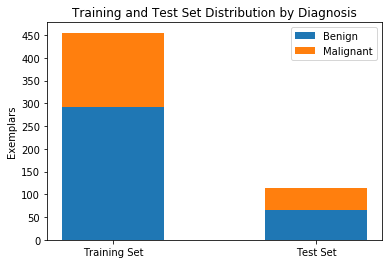

In [16]:
# We will need to reorganise the data tfor stacked bar plots
#plt.figure(figsize=(12, 10))
bar_plot_data = np.column_stack((training_category_counts, test_category_counts))
x_axis_ticks = np.arange(2)
bar_width = 0.5
p1 = plt.bar(x_axis_ticks, bar_plot_data[0], bar_width )
p2 = plt.bar(x_axis_ticks, bar_plot_data[1], bar_width, bottom=bar_plot_data[0])
plt.ylabel('Exemplars')
plt.title('Training and Test Set Distribution by Diagnosis')
plt.xticks(x_axis_ticks, ('Training Set', 'Test Set') )
plt.yticks(np.arange(0, 500, 50))
plt.legend((p1[0], p2[0]), ('Benign', 'Malignant'))
plt.show();

### Modeling

Here we use a multi-layer perceprton to build a machine learning model for the Wisconsin breast cancer dataset, using a portion of the data (80%) for training and the rest for testing the model (20%). 

In [17]:
#https://www.kaggle.com/georgiost77/breast-cancer-machine-learning-prediction 
from sklearn.model_selection import train_test_split

training_set_input, test_set_input, training_set_output, test_set_output = train_test_split(input_features_scaled, target_output,
                                                                            test_size=0.2, random_state=905)

In [18]:
from sklearn.neural_network import MLPClassifier
mlp= MLPClassifier()
mlp.fit(training_set_input, training_set_output)

print('acc on train dataset: {:.3f}'.format(mlp.score(training_set_input,training_set_output)))
print('acc on test dataset: {:.3f}'.format(mlp.score(test_set_input,test_set_output)))

y_pred = mlp.predict(test_set_input)
print(y_pred)

acc on train dataset: 0.985
acc on test dataset: 0.974
['B' 'B' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'M' 'B' 'M' 'B' 'B'
 'B' 'B' 'M' 'B' 'M' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B'
 'B' 'M' 'M' 'M' 'B' 'M' 'M' 'B' 'B' 'M' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'M'
 'M' 'M' 'M' 'B' 'M' 'B' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'M' 'M' 'B' 'B' 'M'
 'B' 'B' 'B' 'M' 'B' 'M' 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'M' 'M' 'B' 'B'
 'M' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'B' 'M' 'M' 'M' 'B'
 'B' 'B' 'B' 'M' 'M' 'B']


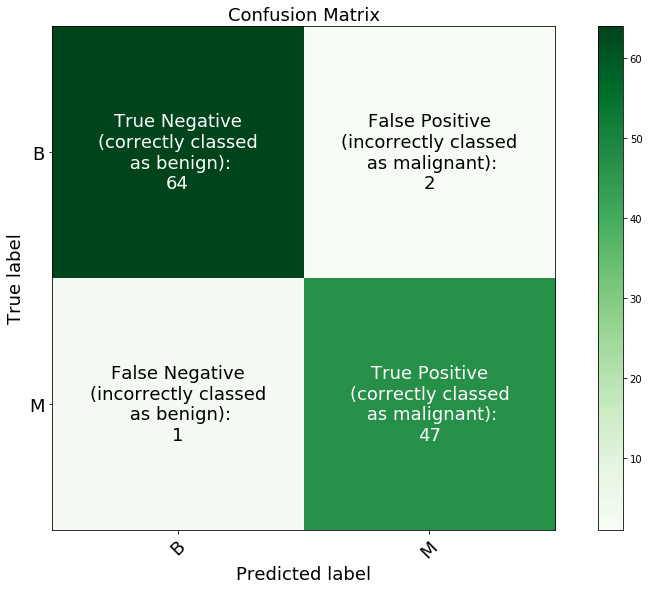

In [19]:
# Based on http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
import itertools
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greens,
                          fontsize=24):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title,fontsize=fontsize,)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, fontsize=fontsize)
    plt.yticks(tick_marks, classes, fontsize=fontsize)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
 #   for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
 #       plt.text(j, i, format(cm[i, j], fmt),
 #                horizontalalignment="center", fontsize=fontsize,
 #                color="white" if cm[i, j] > thresh else "black")

    plt.text(0, 0, "True Negative\n(correctly classed\n as benign):\n" + format(cm[0, 0], fmt),
         horizontalalignment="center", verticalalignment="center",  fontsize=fontsize,
         color="white" if cm[0, 0] > thresh else "black")    
    
    plt.text(0, 1, "False Negative\n(incorrectly classed\n as benign):\n" + format(cm[0, 1], fmt),
     horizontalalignment="center", verticalalignment="center", fontsize=fontsize,
     color="white" if cm[0 , 1] > thresh else "black")   

    plt.text(1, 0, "False Positive\n(incorrectly classed\n as malignant):\n"+ format(cm[1, 0], fmt),
     horizontalalignment="center", verticalalignment="center", fontsize=fontsize,
     color="white" if cm[1, 0] > thresh else "black")   

    plt.text(1, 1, "True Positive\n(correctly classed\n as malignant):\n"+ format(cm[1, 1], fmt),
     horizontalalignment="center", verticalalignment="center", fontsize=fontsize,
     color="white" if cm[1, 1] > thresh else "black")   
        
    plt.tight_layout()
    plt.ylabel('True label', fontsize=fontsize)
    plt.xlabel('Predicted label', fontsize=fontsize)

# Compute confusion matrix
cnf_matrix = confusion_matrix(test_set_output, y_pred)

plt.figure(figsize=(12, 8))

# Plot non-normalized confusion matrix
plot_confusion_matrix(cnf_matrix, classes=['B','M'], 
                      title='Confusion Matrix',fontsize=18)
plt.show()

### Analysis of Confusion Matrix
**True positive (TP)** also known as hit

**True negative (TN)** also known as correct rejection

**False positive (FP)** also known as with __[false alarm](https://en.wikipedia.org/wiki/False_alarm)__ __[Type I error](https://en.wikipedia.org/wiki/Type_I_error)__

**False negative (FN)** also known as __[Type II error](https://en.wikipedia.org/wiki/Type_II_error)__

**Sensitivity, recall, hit rate, or true positive rate (TPR)**
Correctly identifying malignant cases as malignant.
\begin{align}
    {TPR} ={\frac {\mathrm {TP} }{P}}={\frac {\mathrm {TP} }{\mathrm {TP} +\mathrm {FN} }}
\end{align}	

**Specificity, selectivity or true negative rate (TNR)**
\begin{align}
    {TNR} ={\frac {\mathrm {TN} }{N}}={\frac {\mathrm {TN} }{\mathrm {TN} +\mathrm {FP} }}=1-\mathrm {FPR} 
\end{align}	

**Precision or positive predictive value (PPV)**
\begin{align}
{NPV} ={\frac {\mathrm {TN} }{\mathrm {TN} +\mathrm {FN} }}
\end{align}	

**Negative predictive value (NPV)**
\begin{align}
{NPV} ={\frac {\mathrm {TN} }{\mathrm {TN} +\mathrm {FN} }}
\end{align}	

**Miss rate or false negative rate (FNR)**
\begin{align}
{FNR} ={\frac {\mathrm {FN} }{P}}={\frac {\mathrm {FN} }{\mathrm {FN} +\mathrm {TP} }}=1-\mathrm {TPR} 
\end{align}	

**Fall-out or false positive rate (FPR)**
\begin{align}
{FPR} ={\frac {\mathrm {FP} }{N}}={\frac {\mathrm {FP} }{\mathrm {FP} +\mathrm {TN} }}=1-\mathrm {TNR} 
\end{align}	

**False discovery rate (FDR)**
\begin{align}
{FDR} ={\frac {\mathrm {FP} }{\mathrm {FP} +\mathrm {TP} }}=1-\mathrm {PPV} 
\end{align}	

**False omission rate (FOR)**
\begin{align}
{FOR} ={\frac {\mathrm {FN} }{\mathrm {FN} +\mathrm {TN} }}=1-\mathrm {NPV}
\end{align}	

**Accuracy (ACC)**
\begin{align}
{ACC} ={\frac {\mathrm {TP} +\mathrm {TN} }{P+N}}={\frac {\mathrm {TP} +\mathrm {TN} }{\mathrm {TP} +\mathrm {TN} +\mathrm {FP} +\mathrm {FN}}}
\end{align}	

**F1 score**

is the harmonic mean of precision and sensitivity
\begin{align}
F_{1}=2\cdot {\frac {\mathrm {PPV} \cdot \mathrm {TPR} }{\mathrm {PPV} +\mathrm {TPR} }}={\frac {2\mathrm {TP} }{2\mathrm {TP} +\mathrm {FP} +\mathrm {FN} }}
\end{align}	

**Matthews correlation coefficient (MCC)**
\begin{align}
{MCC} ={\frac {\mathrm {TP} \times \mathrm {TN} -\mathrm {FP} \times \mathrm {FN} }{\sqrt {(\mathrm {TP} +\mathrm {FP} )(\mathrm {TP} +\mathrm {FN} )(\mathrm {TN} +\mathrm {FP} )(\mathrm {TN} +\mathrm {FN} )}}}
\end{align}	

**Informedness or Bookmaker Informedness (BM)**
\begin{align}
{BM} =\mathrm {TPR} +\mathrm {TNR} -1
\end{align}	

In [20]:
tn, fp, fn, tp = cnf_matrix.ravel()
import math
np.set_printoptions(precision=2)
print("True positive (correctly classed as malignant): ", tp)
print("True negative (correctly classed as benign): ", tn)
print("False positive (incorrectly classed as malignant): ", fp)
print("False negative (incorrectly classed as benign): ", fn)
tpr = tp/ (tp+fn)
print("Sensitivity, recall, hit rate, or true positive rate (TPR): {0:0.2f}".format(tpr))
tnr = tn/ (tn+fp)
print("Specificity, selectivity or true negative rate (TNR): {0:0.2f}".format(tnr))
ppv = tp /( tp+ fp)
print("Precision or positive predictive value (PPV) = {} / ({} + {}) = ".format(tp,tp,fp) + " {0:0.2f}".format(ppv))
npv = tn / (tn + fn)
print("Negative predictive value (NPV): {0:0.2f}".format(npv))
fnr = fn / (fn + tp)
print("Miss rate or false negative rate (FNR): {0:0.2f}".format(fnr))
fpr = fp / (fp + tn)
print("Fall-out or false positive rate (FPR): {0:0.2f}".format(fpr))
fdr = fp / (fp + tp)
print("False discovery rate (FDR): {0:0.2f}".format(fdr))
fomr = fn / (fn + tn)  
print("False omission rate (FOR): {0:0.2f}".format(fomr))
acc = (tp + tn) / (tp+ tn + fp +fn)
print("Accuracy (ACC): {0:0.2f}".format(acc))
f1 = 2*tp/ (2*tp+fp+fn)
print("F1 score: {0:0.2f}".format(f1))
mcc = (tp*tn-fp*fn)/math.sqrt((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn))
print("Matthews correlation coefficient (MCC): {0:0.2f}".format(mcc))
bm = tpr + tnr - 1
print("Informedness or Bookmaker Informedness (BM): {0:0.2f}".format(ppv))

True positive (correctly classed as malignant):  47
True negative (correctly classed as benign):  64
False positive (incorrectly classed as malignant):  1
False negative (incorrectly classed as benign):  2
Sensitivity, recall, hit rate, or true positive rate (TPR): 0.96
Specificity, selectivity or true negative rate (TNR): 0.98
Precision or positive predictive value (PPV) = 47 / (47 + 1) =  0.98
Negative predictive value (NPV): 0.97
Miss rate or false negative rate (FNR): 0.04
Fall-out or false positive rate (FPR): 0.02
False discovery rate (FDR): 0.02
False omission rate (FOR): 0.03
Accuracy (ACC): 0.97
F1 score: 0.97
Matthews correlation coefficient (MCC): 0.95
Informedness or Bookmaker Informedness (BM): 0.98


## Grid Search
The code below searches for the best C and gamma parameters.

In [21]:
from __future__ import print_function
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC

print(__doc__)


# Split the dataset in two equal parts
training_set_input, test_set_input, training_set_output, test_set_output = train_test_split(input_features_scaled, target_output,
                                                                            test_size=0.2, random_state=905)

# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(SVC(), tuned_parameters, cv=5,
                       scoring='%s_macro' % score)
    clf.fit(training_set_input, training_set_output)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = test_set_output, clf.predict(test_set_input)
    print(classification_report(y_true, y_pred))
    print()

# Note the problem is too easy: the hyperparameter plateau is too flat and the
# output model is the same for precision and recall with ties in quality.

Automatically created module for IPython interactive environment
# Tuning hyper-parameters for precision



C:\Users\paulw\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\paulw\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\paulw\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\paulw\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\paulw\Anaconda3\lib\site-packages\sklearn\m

Best parameters set found on development set:

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}

Grid scores on development set:

0.321 (+/-0.003) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.321 (+/-0.003) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.934 (+/-0.033) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.321 (+/-0.003) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.963 (+/-0.028) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.934 (+/-0.033) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.977 (+/-0.030) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.963 (+/-0.028) for {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
0.976 (+/-0.027) for {'C': 1, 'kernel': 'linear'}
0.975 (+/-0.034) for {'C': 10, 'kernel': 'linear'}
0.958 (+/-0.036) for {'C': 100, 'kernel': 'linear'}
0.951 (+/-0.043) for {'C': 1000, 'kernel': 'linear'}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

           

## Grid Search with Heatmap
The code below searches for the best C and gamma parameters using sklearn.model_selection  GridSearchCV and produces a heatmap.

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV

# The score are encoded as colors with the hot colormap which varies from dark
# red to bright yellow to white. 
# Pick the parameters with the highest score (brightest colour)

# #############################################################################
# Train classifiers
#
# For an initial search, a logarithmic grid with basis
# 10 is often helpful. Using a basis of 2, a finer
# tuning can be achieved but at a much higher cost.

# Split the dataset in two equal parts
training_set_input, test_set_input, training_set_output, test_set_output = train_test_split(input_features_scaled, target_output,
                                                                            test_size=0.2, random_state=905)

#C_range = np.logspace(-2, 10, 13)
#gamma_range = np.logspace(-9, 3, 13)
#param_grid = dict(gamma=gamma_range, C=C_range)

#param_grid = {'solver': ['lbfgs'], 'max_iter': [1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000 ], 'alpha': 10.0 ** -np.arange(1, 10), 'hidden_layer_sizes':np.arange(10, 15), 'random_state':[0,1,2,3,4,5,6,7,8,9]}
 

alpha_range =  10.0 ** -np.arange(0, 9)
hidden_layer_sizes = np.arange(10, 20)
max_iter = [1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000 ]

#param_grid = dict(alpha=alpha_range, hidden_layer_sizes=hidden_layer_sizes)    
param_grid = dict(alpha=alpha_range, max_iter=max_iter)    

In [32]:
param_grid

{'alpha': array([1.  , 0.1 , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]),
 'max_iter': [1000,
  1100,
  1200,
  1300,
  1400,
  1500,
  1600,
  1700,
  1800,
  1900,
  2000]}

In [33]:
import warnings
warnings.filterwarnings('ignore')
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
grid = GridSearchCV(MLPClassifier(), param_grid=param_grid, cv=cv)
grid.fit(training_set_input, training_set_output)

print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

The best parameters are {'alpha': 0.1, 'max_iter': 1100} with a score of 0.97


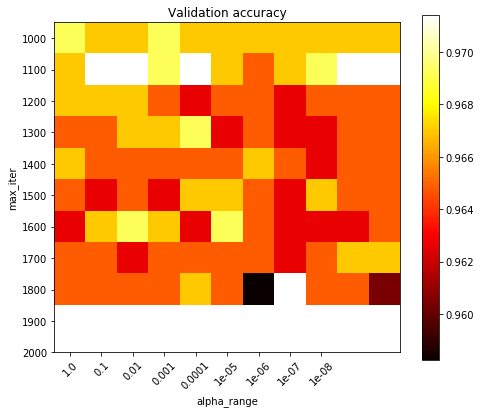

In [35]:
scores = grid.cv_results_['mean_test_score'].reshape(len(alpha_range),
                                                     len(max_iter))
plt.figure(figsize=(8, 6))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot) 
plt.xlabel('alpha_range')
plt.ylabel('max_iter')
plt.colorbar()
plt.xticks(np.arange(len(alpha_range)), alpha_range, rotation=45)
plt.yticks(np.arange(len(max_iter)), max_iter)
plt.title('Validation accuracy')
plt.show()